In [37]:
#The enviorment of qubit systems are highly sensitive. External noise, such as stray electromagnetic fields and 
#voltages, and internal noise, like material impurities, lessen the precision of qubit states which can render them 
#unreliable. Therefore, noise reduction/cancellation is a large area of focus in quantum computing.
#In this program, we used a quantum noise simulator to approximate what noise error looks like and how it affects 
#the resulting states of qubits.

from qiskit import QuantumCircuit
%matplotlib inline
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeVigo

#needed for the noisemodel
device_backend = FakeVigo()
coupling_map = device_backend.configuration().coupling_map

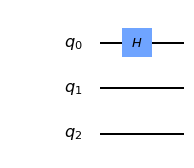

In [38]:
circ = QuantumCircuit(3)
circ.h(0)
circ.draw(output='mpl') #draw circuit

#Let us begin to demonstrate this noise error with a relatively simple circuit: with 3 qubits and a Hadamard gate
#applied to the first qubit (q0).


In [39]:
circ.measure([0,1,2], [2,1,0])

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Hadamard Gate')

#The probability of each qubit state after measurement is displayed in the following histogram. This is a 
#representation of our "ideal" results.

CircuitError: 'Index out of range.'

In [16]:
#Begin creating the noise model from backend properties
noise_model = NoiseModel.from_backend(device_backend)
print(noise_model)#print out a "template" of what the noise model looks like

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['measure', 'cx', 'id', 'u2', 'u3']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 1]), ('cx', [3, 1]), ('cx', [3, 4]), ('cx', [4, 3]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


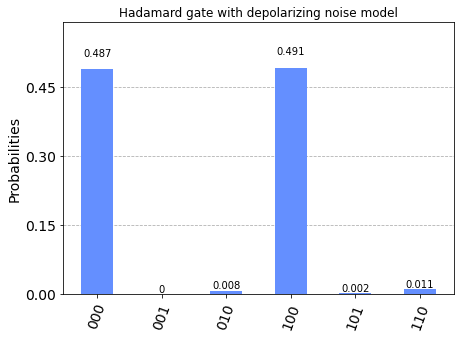

In [18]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Hadamard gate with depolarizing noise model")

#(Cont. from previous cell) However, real life quantum computers take in noise error. The histogram below shows an
#approximation of how noise can disrupt the ~50-50 probability between 000 and 100 we see when we measure the 
#state of the qubits after a Hadamard gate. While the probability should only ponder between the two states
#given by the "ideal" histogram, the noise model shows that in rare instances on real quantum computers, other 
#states such as 010, 110, etc. can also result from the Hadamard gate.

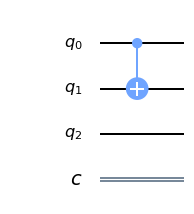

In [32]:
circ = QuantumCircuit(3, 1)
circ.cx(0,1)
circ.draw(output='mpl') #draw circuit
#Now lets look at the noise error resulting from a Feynman gate.

In [33]:
circ.measure([0,1,2], [2,1,0])

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Feynman Gate (Controlled Not)')
#Here is the ideal probability of the state of the qubits after measuring a Feynman gate-- 100% of the time, the
#state of the qubits after measurement would still be 000. Refer back to the circuit diagram for the CNOT gate.
#Since the control qubit (q0) starts at state 0, the inverter on q1 would not be activated and therefore, the
#states of the qubits are unchanged (000).

CircuitError: 'Index out of range.'

In [35]:
# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(device_backend)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u3', 'id', 'u2', 'measure', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 1]), ('cx', [3, 1]), ('cx', [3, 4]), ('cx', [4, 3]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


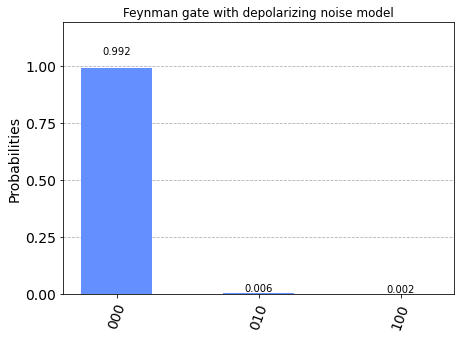

In [36]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Feynman gate with depolarizing noise model")
#Now let us look at the noise model of the CNOT gate. Again, an actual quantum computer has the probability of
#snapping to a unpredicted state after measurement.

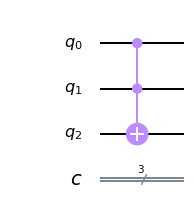

In [38]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
# Toffoli
circ.ccx(0,1,2)
circ.draw(output='mpl') #draw circuit
#Lets look at a gate we haven't learned before in this course. The following circuit depicts a Toffoli gate
#(Controlled-Controlled-Not gate) , which spans across 3 qubits. Similarly to the Feynman gate, the CCNOT gate uses
#other qubits to control whether or not the inverter will be activated. The inputs to the controls both have to
#equal a state of 1 in order for the third qubit to flip values-- 1 to 0, or 0 to 1.

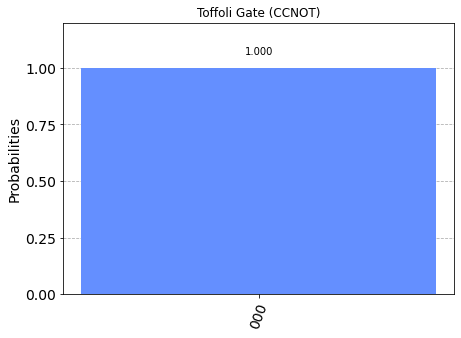

In [39]:
circ.measure([0,1,2], [2,1,0])

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Toffoli Gate (CCNOT)')
#Like the Feynman gate, since in this instance the starting states of the qubits are all 0, the inverter does not
#activate and we theoretically measure 000 100% of the time.

In [40]:
# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(device_backend)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u3', 'id', 'u2', 'measure', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 1]), ('cx', [3, 1]), ('cx', [3, 4]), ('cx', [4, 3]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


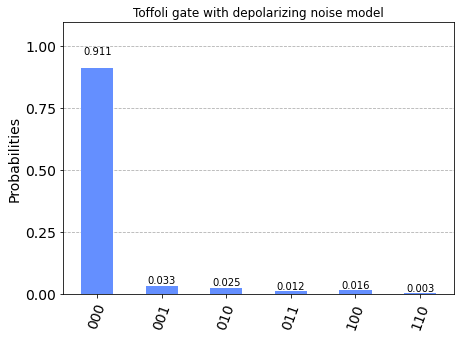

In [41]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Toffoli gate with depolarizing noise model")
#Here is the noise model for the Toffoli gate. You may notice that the noise is quite a bit larger than the H and
#CNOT gate.

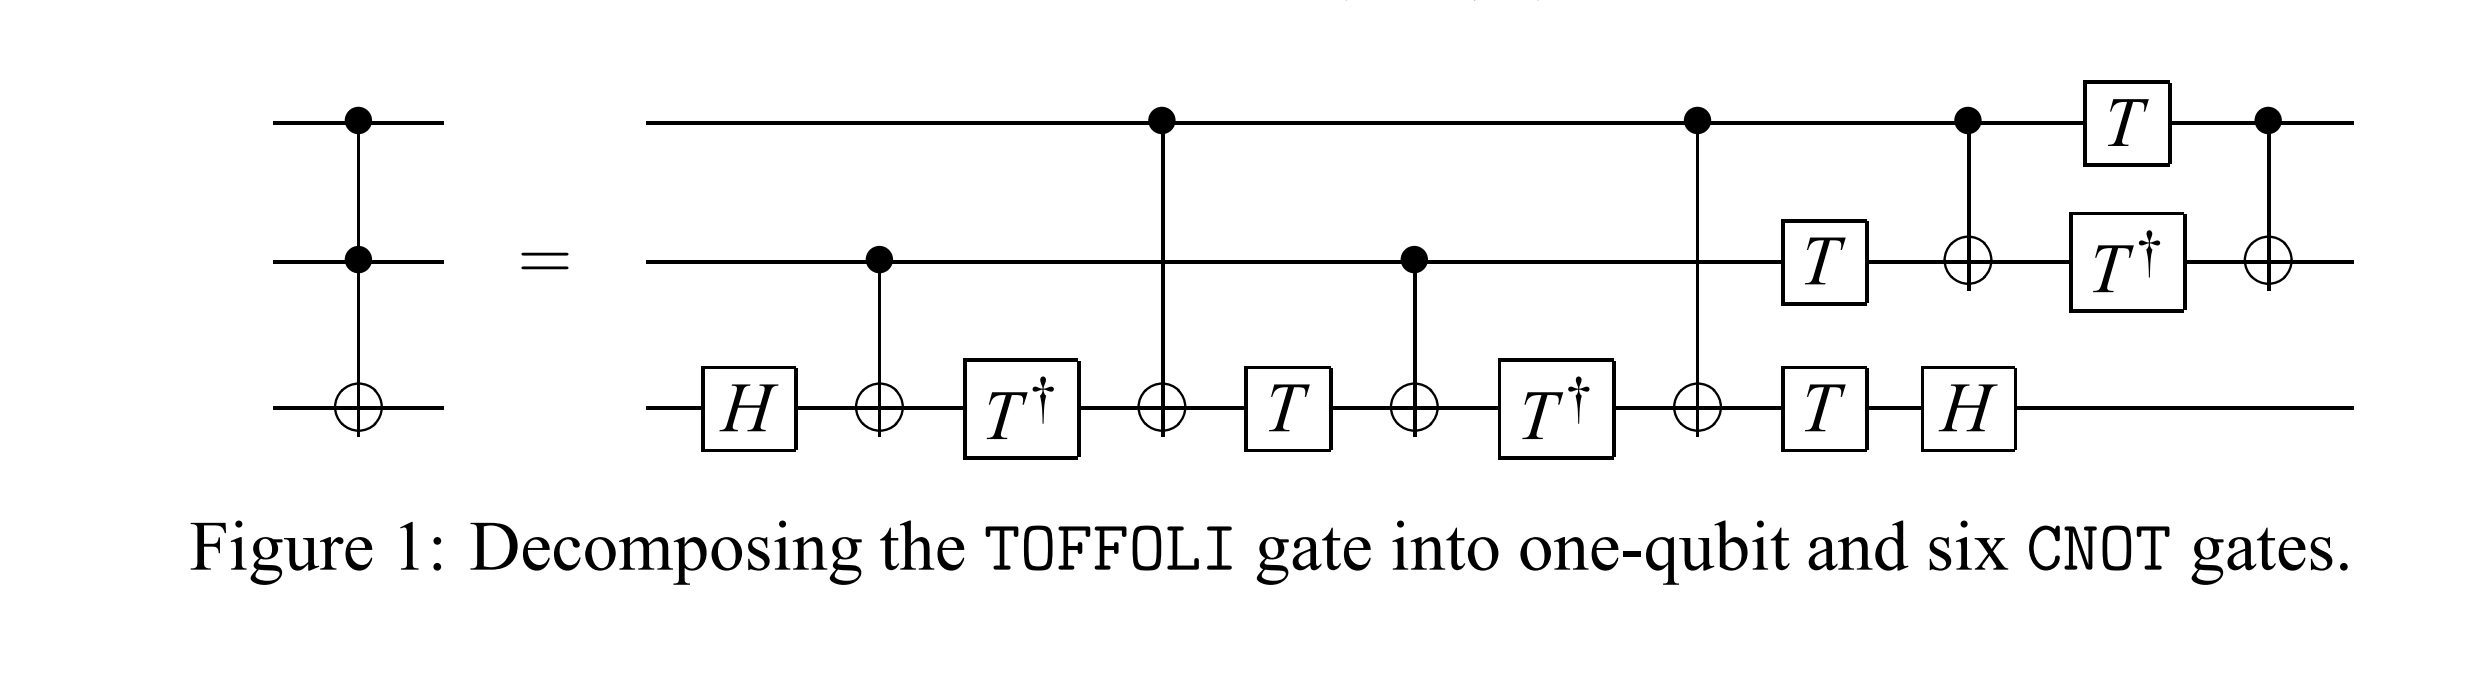

In [42]:
from IPython.display import Image
Image(filename='fulltoffoli.png')
#This is because of the costly composition of a Toffoli gate. The circuit drawing we saw above was a simplified 
#depiction of a CCNOT gate. The circuit illustration below shows what a Toffoli gate actually looks like. Being 
#composed of so many gates, it not a surprise that building a Toffoli gate is expensive.

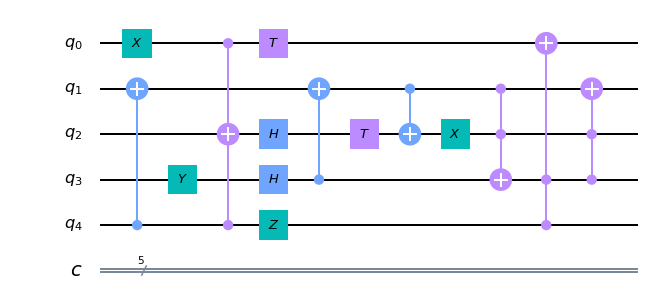

In [43]:
# Construct quantum circuit
circ = QuantumCircuit(5, 5)
circ.cx(4,1)
circ.x(0)
circ.y(3)
circ.ccx(4,0,2)
circ.h(3)
circ.h(2)
circ.t(2)
circ.cx(3,1)
circ.cx(1, 2)
circ.x(2)
circ.z(4)
circ.ccx(2,1,3)
circ.t(0)
circ.ccx(4,3,0)
circ.ccx(2,3,1)
circ.draw(output='mpl') #draw circuit
#Now, let us go ham with a 5 qubit (the max. amount the noise model could handle) and a whole lot of gates, just to
#really drive the point home.

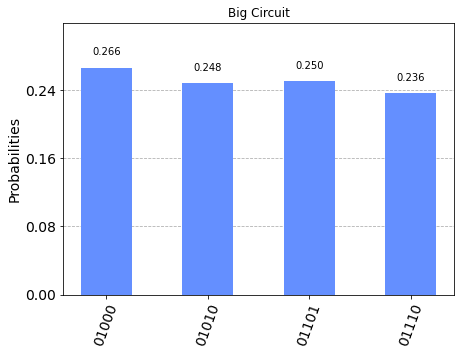

In [44]:
circ.measure([0,1,2,3], [3,2,1,0])

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Big Circuit')
#Measure, and we get a theoretical probability of obtaining 4 states with approx. 25% chance each. We believe the
#probability stems from the amount of Hadamard gates-- two-- in our Big Circuit.

In [45]:
# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(device_backend)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u3', 'id', 'u2', 'measure', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 1]), ('cx', [3, 1]), ('cx', [3, 4]), ('cx', [4, 3]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


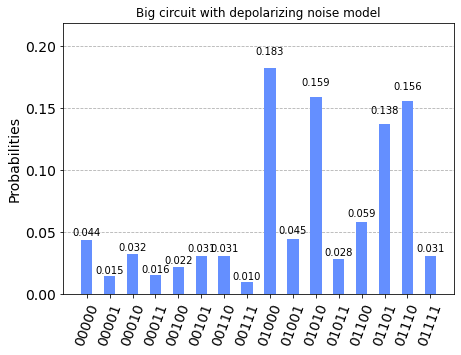

In [47]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Big circuit with depolarizing noise model")
#Wow-- now that is a lot of noise! To reiterate, as the number of gates and qubits increase in quantum algorithms, 
#the states of qubits become unreliable, since there is a larger chance of qubits becoming unpredictable. Today, 
#noise is a barrier that prevents quantum computers from being as widespread and advanced as it can be.

#Sources:
#https://phys.org/news/2019-09-advance-noise-cancelling-quantum.html#:~:text=External%20noise%20in%20quantum%20computing,the%20development%20of%20quantum%20computers.
#https://www.sciencealert.com/cutting-environmental-noise-brings-us-closer-to-quantum-computing
#https://arxiv.org/pdf/0803.2316.pdf
#https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html#Generating-a-device-backend-noise-model